## Project Name :- Telecom Customer Churn Business Analysis using Machine learning

*   Name : Atul Mishra
*   Email: atul.nothing@gmail.com
*   Project_ID : PM-PR-0017 Telecom–Churn Rate ML
*   Start Date : 18/09/2024
*   End Date : 20/09/2024
*   Batch_ID : PTID-CDS-AUG-24-2023
*   Dataset link :

### 1. Importing Libraries

In [ ]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 1.2. Inserting Dataset

In [ ]:
data= pd.read_csv("Telecom_crunch_Dataset.csv",names= ['State','Account_Length','Area_Code','Phone','International_Plan','VMail_Plan',
                                                       'VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls',
                                                       'Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins',
                                                       'International_calls','International_Charge','CustServ_Calls','Churn'])

In [ ]:
# Removing the first row
data= data.iloc[1:]

In [ ]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 2. Domain Analysis

* State: Geographic location of the customer.

* Account Length: Duration of the customer's relationship with the service provider.

* Area Code: Geographic region associated with the customer's phone number.

* Phone Number: Unique identifier for the customer's account.

* International Plan: Indicates whether the customer has an international calling plan.

* VMail Plan: Indicates whether the customer has a voicemail plan.

* VMail Message: Number of voicemail messages received.

* Day, Eve, Night Mins/Calls/Charge: Usage data for different time periods (day, evening, night).

* International Mins/Calls/Charge: Usage data for international calls.

* CustServ Calls: Number of customer service calls made.

* Churn: Binary variable indicating whether the customer has churned (left the service).

### 3.1. Basic Checks

In [ ]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
State,0
Account_Length,0
Area_Code,0
Phone,0
International_Plan,0
VMail_Plan,0
VMail_Message,0
Day_Mins,0
Day_Calls,0
Day_Charge,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(4578, 21)

### 3.2. Basic Information

In [ ]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,State[object],1. WV2. AL3. MN4. ID5. OH6. VA7. NY8. OR9. WY10. NJ11. other,"149 (3.3%)113 (2.5%)111 (2.4%)110 (2.4%)110 (2.4%)108 (2.4%)107 (2.3%)106 (2.3%)106 (2.3%)105 (2.3%)3,453 (75.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpElEQVR4nO3cQWoaYQCG4d8iodkoEshhcogetofwNiFkFk3Ixi5KQau7xNfRPs+qzGogLyMz/F8Xu91uQOHbpW+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKMcT/GuPvn+sdut3u7wP1ww5YPDw8/VqvVZv/iNE0vi8Xip+D4SsvVarV5enp6W6/X72OM8fr6+n273W6en5/vxhhi48ssxxhjvV6/Pz4+/tq7fn+h++GGeUEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzH+nGH7e2H/3/CVltM0vWy3283YO8M2TdPLGOPjcrfFLbJBILPwX2ZROfVk81TjLI7WVZZVnMvBusqyinM6ta6yrOIsfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczB4MXbhnI4GL8YunItj4WQMXsh4spExeCFj8ELG4IWMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGS8IZPyMkrGuImNdRca6iowXBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4Fk7GuoqMJxsZgxcyBi9kDF7I+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kPFkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjI2CGSsq8h4spGxriJjXUXGuoqMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGU82MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjBYGMn1Ey1lVkrKvIWFeR8YJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGcfCyVhXkfFkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcyp55sXL9Z/jodDV64fnMdLR0MXi59M3zenEdLpwYvXL9ZjpZ81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzMHjh+s35b3k0eOH6zXW05Fj4bZrlsXCDFzJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyPwGDa9O4tsZntYAAAAASUVORK5CYII="">",0(0.0%)
2,Account_Length[object],1. 902. 873. 1124. 1055. 936. 1007. 1018. 949. 7810. 12711. other,"60 (1.3%)55 (1.2%)53 (1.2%)53 (1.2%)53 (1.2%)53 (1.2%)53 (1.2%)50 (1.1%)49 (1.1%)48 (1.0%)4,051 (88.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpUlEQVR4nO3cQWobZxyH4b+ESaLNCGHwMXwAH6KH7SF0AN/DGM+iSrJRFoHSTaHQyauiPs8BzCxePjHD9/Puer0OFPa3fgD+P8RGRmxkxEZGbGTERkZsZMRGRmxkdjNzmJlPM/P9er1ebvw83LGHx8fH35ZlOa3r+r7b7X4XHL/KflmW0/Pz8yzLcpqfJxz8EvuZmcPh8O3WD8L984JARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk9jMzl8vl860fhPu3X9f1/fX1ddZ1fZ+Z77d+IO6XDQKZnX+ZRcXJRsa6iox1FRnrKjI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9knGxkDF7IGLyQMXgh46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQsYLAhk/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyroWTsa4i42QjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNaOBmDFzJONjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriJjg0DGuoqMk42MdRUZ6yoy1lVkfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGvhZAxeyDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IWMFwQyfkbJWFeRsa4iY11FxgsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZFwLJ2NdRcbJRsbghYzBCxmDFzI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9k/nqywd/Z5Ffvz8HLFk/EfdpqDPWwLMvp5eXlcjwev271cNyPj4+PL+fz+fT29vZpZv5dbDMzx+Px69PT0x+bPB336LDFH/FRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczDzM9rJLd+EP6btmzjYV3X9/P5fJqNrpFwf7YaQ7kWzj+xybVwgxcyXhDIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8ABfkt8WjVBjGAAAAAElFTkSuQmCC"">",0(0.0%)
3,Area_Code[object],1. 4152. 4083. 510,"2,279 (49.8%)1,151 (25.1%)1,148 (25.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgUlEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYY/4MmZKIMsoHGhftL6jkreJgPGxndYV3XgoQfvQ/g/zFU1WtVvfQ+ZGc+1nV9633E3ozn8/nXNE2n3ofsSWvtPgzDb8F9zzhN0+l6vb7N8/ze+5g9eDweP5dlOd1ut5eqEts3jFVV8zy/Xy6XP72P2ZHX3gfskQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVV/vaPU+ZC98Vs8bW2v3ZVlO5R2tv9

### 4.1. Data Preprocessing

In [ ]:
#droping null values
data.dropna(inplace=True)

In [ ]:
# Updating Data Types for Decimal Columns(“Object” to “Float”)
data[['Account_Length', 'Area_Code','VMail_Message',
           'Day_Mins', 'Day_Calls', 'Day_Charge','Eve_Mins', 'Eve_Calls',
           'Eve_Charge', 'Night_Mins', 'Night_Calls','Night_Charge',
           'International_Mins', 'International_calls','International_Charge',
           'CustServ_Calls']]= data[['Account_Length', 'Area_Code','VMail_Message',
           'Day_Mins', 'Day_Calls', 'Day_Charge','Eve_Mins', 'Eve_Calls',
           'Eve_Charge', 'Night_Mins', 'Night_Calls','Night_Charge',
           'International_Mins', 'International_calls','International_Charge',
           'CustServ_Calls']].astype(float)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,4577.0,100.602141,39.669263,1.00,73.00,100.00,127.00,243.00
Area_Code,4577.0,437.067511,42.301093,408.00,408.00,415.00,510.00,510.00
VMail_Message,4577.0,7.846406,13.572882,0.00,0.00,0.00,18.00,51.00
Day_Mins,4577.0,180.298143,54.003902,0.00,143.70,180.00,216.60,351.50
Day_Calls,4577.0,100.092419,19.917498,0.00,87.00,100.00,113.00,165.00
Day_Charge,4577.0,30.651245,9.180609,0.00,24.43,30.60,36.82,59.76
Eve_Mins,4577.0,200.466900,50.594354,0.00,165.80,200.80,234.10,363.70
Eve_Calls,4577.0,100.174350,19.799999,0.00,87.00,101.00,114.00,170.00
Eve_Charge,4577.0,17.039913,4.300512,0.00,14.09,17.07,19.90,30.91
Night_Mins,4577.0,200.640747,50.560034,23.20,167.10,200.80,234.90,395.00


In [ ]:
from summarytools import dfSummary
# Convert the Series 'data' back to a DataFrame.
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,State[object],1. WV2. AL3. MN4. ID5. OH6. VA7. NY8. OR9. WY10. NJ11. other,"149 (3.3%)113 (2.5%)111 (2.4%)110 (2.4%)110 (2.4%)108 (2.4%)107 (2.3%)106 (2.3%)106 (2.3%)105 (2.3%)3,452 (75.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpElEQVR4nO3cQWoaYQCG4d8iodkoEshhcogetofwNiFkFk3Ixi5KQau7xNfRPs+qzGogLyMz/F8Xu91uQOHbpW+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKMcT/GuPvn+sdut3u7wP1ww5YPDw8/VqvVZv/iNE0vi8Xip+D4SsvVarV5enp6W6/X72OM8fr6+n273W6en5/vxhhi48ssxxhjvV6/Pz4+/tq7fn+h++GGeUEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzH+nGH7e2H/3/CVltM0vWy3283YO8M2TdPLGOPjcrfFLbJBILPwX2ZROfVk81TjLI7WVZZVnMvBusqyinM6ta6yrOIsfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczB4MXbhnI4GL8YunItj4WQMXsh4spExeCFj8ELG4IWMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGS8IZPyMkrGuImNdRca6iowXBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4Fk7GuoqMJxsZgxcyBi9kDF7I+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kPFkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjI2CGSsq8h4spGxriJjXUXGuoqMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGU82MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjBYGMn1Ey1lVkrKvIWFeR8YJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGcfCyVhXkfFkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcyp55sXL9Z/jodDV64fnMdLR0MXi59M3zenEdLpwYvXL9ZjpZ81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzMHjh+s35b3k0eOH6zXW05Fj4bZrlsXCDFzJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyPwGDa9O4tsZntYAAAAASUVORK5CYII="">",0(0.0%)
2,Account_Length[float64],Mean (sd) : 100.6 (39.7)min < med < max:1.0 < 100.0 < 243.0IQR (CV) : 54.0 (2.5),218 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpUlEQVR4nO3dsa7aMBSA4eNyQQGuEhAVbKwMlTowsvQN+rBdu3VgR+IN2JCAgKCXEkK6daJckjgXH/N/u4WHX5EJ2DZZlgnguk+PngBwj5dHT8BVxpimiDQKDj9lWfZmcz7PjlCvMMY0e73e9zAMu0XG73a7jTHmB7HaQ6jXNcIw7E4mk7coio55Bm6322A6nXZXq1VDRAjVEkK9IYqiY7/f/11gaNP6ZJ6ct6GWXGOGl8ulbnM+KMfLUMuuMZMkCdI0/XI8Hn+JSJEnKizzMlQpscYUEVksFt35fN46n8+1KiaH/HwNVUSKrzE3mw1rTMfwwh8qECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVPD6J9RHSdO0LiKhMabIcHYHXEGolh0Oh3qSJF+Hw2GtVqvl/kMMuwOuI1TLTqfTSxAErfF4fBwMBps8Y9kd8H+EWpF2u83uAIv4MgUVnH6ilthOwlYSzzgbapntJGwl8Y+zoUqJ7SRsJfGPy6GKSLHtJGwl8Q9fpqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMH5P04/m5KHV4h4eoAFoTqk7OEVIv4eYEGoDilzeIWI3wdYEKqDShxeIeLpARaVhso1j7ClslC55hE2VflE5ZpHWFP5GpVrHmEDL/yhAqFCBUKFCoQKFQgVKhAqVOAnVM/4enUQoXrE56uD3g2Vc/T18PnqoJuhco6+Tj5eHfTeE5Vz9OGEu9aonKOPR+P1FFQgVKjA6yn84/IOWEKFiNjZARvH8d4Y81NEioy/GfldoW632yDvp+73+0BE5HA4BMvlsvWR47V+9iPnvV6vX4MgaI1GI9PpdP7k/ew4jl9ns9m34XD4uYofG/4CXNyEl8eh3XcAAAAASUVORK5CYII="">",0(0.0%)
3,Area_Code[float64],1. 415.02. 408.03. 510.0,"2,278 (49.8%)1,151 (25.1%)1,148 (25.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgUlEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYY/4MmZKIMsoHGhftL6jkreJgPGxndYV3XgoQfvQ/g/zFU1WtVvfQ+ZGc+1nV9633E3ozn8/nXNE2n3ofsSWvtPgzDb8F9zzhN0+l6vb7N8/ze+5g9eDweP5dlOd1ut5eqEts3jFVV8zy/Xy6XP72P2ZHX3gfskQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVV/vaPU+ZC98Vs8bW2v3ZVlO5R2tv9Zau1fVR+879sYG4Tk2CE8YTPlI2fo3m2+QA9n0usqK6Vg2u66yYjqera+rPCEfiD91iREbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRGz2XXVFm/i32x6XWXFdCw2CMRYVxHjAYEYP6PEmPIRY8pHjCkfMR4QiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRFjykeMKR8xNgjEmPIR8wlKvKNKlBuUZgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Phone[object],1. 382-46572. 382-49433. 372-98524. 364-53625. 394-92206. 412-14707. 404-63378. 345-45899. 333-722510. 402-16681

In [ ]:
'''
Creating New Columns from Phone Prefixes, Need to split the prefix values from the data[Phone] feature into separate columns.
This separation will facilitate further analysis.
'''
Prefix_num = []
Post_num = []

for i in data['Phone']:
    Prefix_num.append(i.split('-')[0])
    Post_num.append(i.split('-')[1])


In [ ]:
Prefix_num = pd.DataFrame(Prefix_num)

In [ ]:
data = pd.concat([data, Prefix_num], axis=1)

In [ ]:
data.rename(columns={0: 'Prefix_num'}, inplace=True)

In [ ]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,Prefix_num
1,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.,371
2,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.,358
3,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.,375
4,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.,330
5,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.,391


In [ ]:
#droping null values
data.dropna(inplace=True)

### 5. EDA

5.1. Univariate Analysis

In [ ]:
for i in data:
  fig= px.histogram(data,x= i,color='Churn',barmode='group')
  fig.show()

### Insights

* Customer which have International_Plan tend to churn more because according to data 437 users use this plane and out of 437, 184 (42%)Customer are churn.

* 4 state have move than 20 true churn. (NJ,WV,TX & WA)
* State VA have lowest Churn.
* Minimun count of churn rate in data is 4 and maximum is 24.
* Following Features are normally distributed:-
'Account_Length', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'International_Mins','International_Charge'

* Following features are positive skewed distribution:- 'VMail_Message','International_calls','CustServ_Calls','International_calls'


### Insights from charges

1. Day_Charge Distribution: The Day_Charge represents the daily call costs for customers.
* On average, each customer spends around 30 per day on calls.
* Its a bell-shaped curve (like a normal distribution) where most customers fall around this average value.
* When the daily call cost exceeds 40, the likelihood of churn starts increasing.
* When the daily call cost goes beyond 54, all customers churn (100%).
So, higher call costs seem to lead to more customers leaving.

2. Total International Charge Distribution: This information helps us understand the typical spending behavior.
* On average, customers spend between 2.70 and 3.20 per day on international calls.
* The percentage of customer churn (i.e., customers leaving the service) has increased when the total call costs exceed 3.00.
* This suggests that higher call costs may be a contributing factor to customer attrition.

In [ ]:
# Internationl_calls vs International plans
fig= px.histogram(data,x= 'International_calls',color='International_Plan',barmode='group')
fig.show()

### Insights

1. Data Distribution for international_calls:

* Most customers make around 3 international calls per day. This distribution tends to be skewed to the right, meaning there are relatively few customers with very high call volumes.
* Among customers with an international plan (yes), the churn rate is also high.
* Especially for those folks who make fewer than 8 international calls per day. It’s like they’re saying, “Why bother with all these calls? I’m out!” 📞🏃‍♂️

2. What Could Be Happening?
* Well, my data detective hat is on! 🕵️‍♂️
* Maybe those heavy callers (the ones with more than 8 calls) are super loyal. They’re like, “I’ve got friends in every country, and I’m sticking around!” 🌎🤝
* But the light callers? They might be thinking, “Eh, I don’t need this international plan. I’ll just WhatsApp my cousin in Australia.” 📱🇦🇺

3. Action Plan:
* If I were the telecom company, I’d focus on those light callers. Maybe sweeten the international plan deal for them—throw in some extra emojis or something. 😄🌐
* And hey, let’s not forget the heavy callers. A little appreciation goes a long way. Maybe a virtual high-five for their loyalty? 🙌📞

In [ ]:
fig= px.pie(data, names='International_Plan', title='International_Plan')
fig.show()

In [ ]:
num_col= data.select_dtypes(include=np.number).columns

### 5.2. Bivariate Analysis

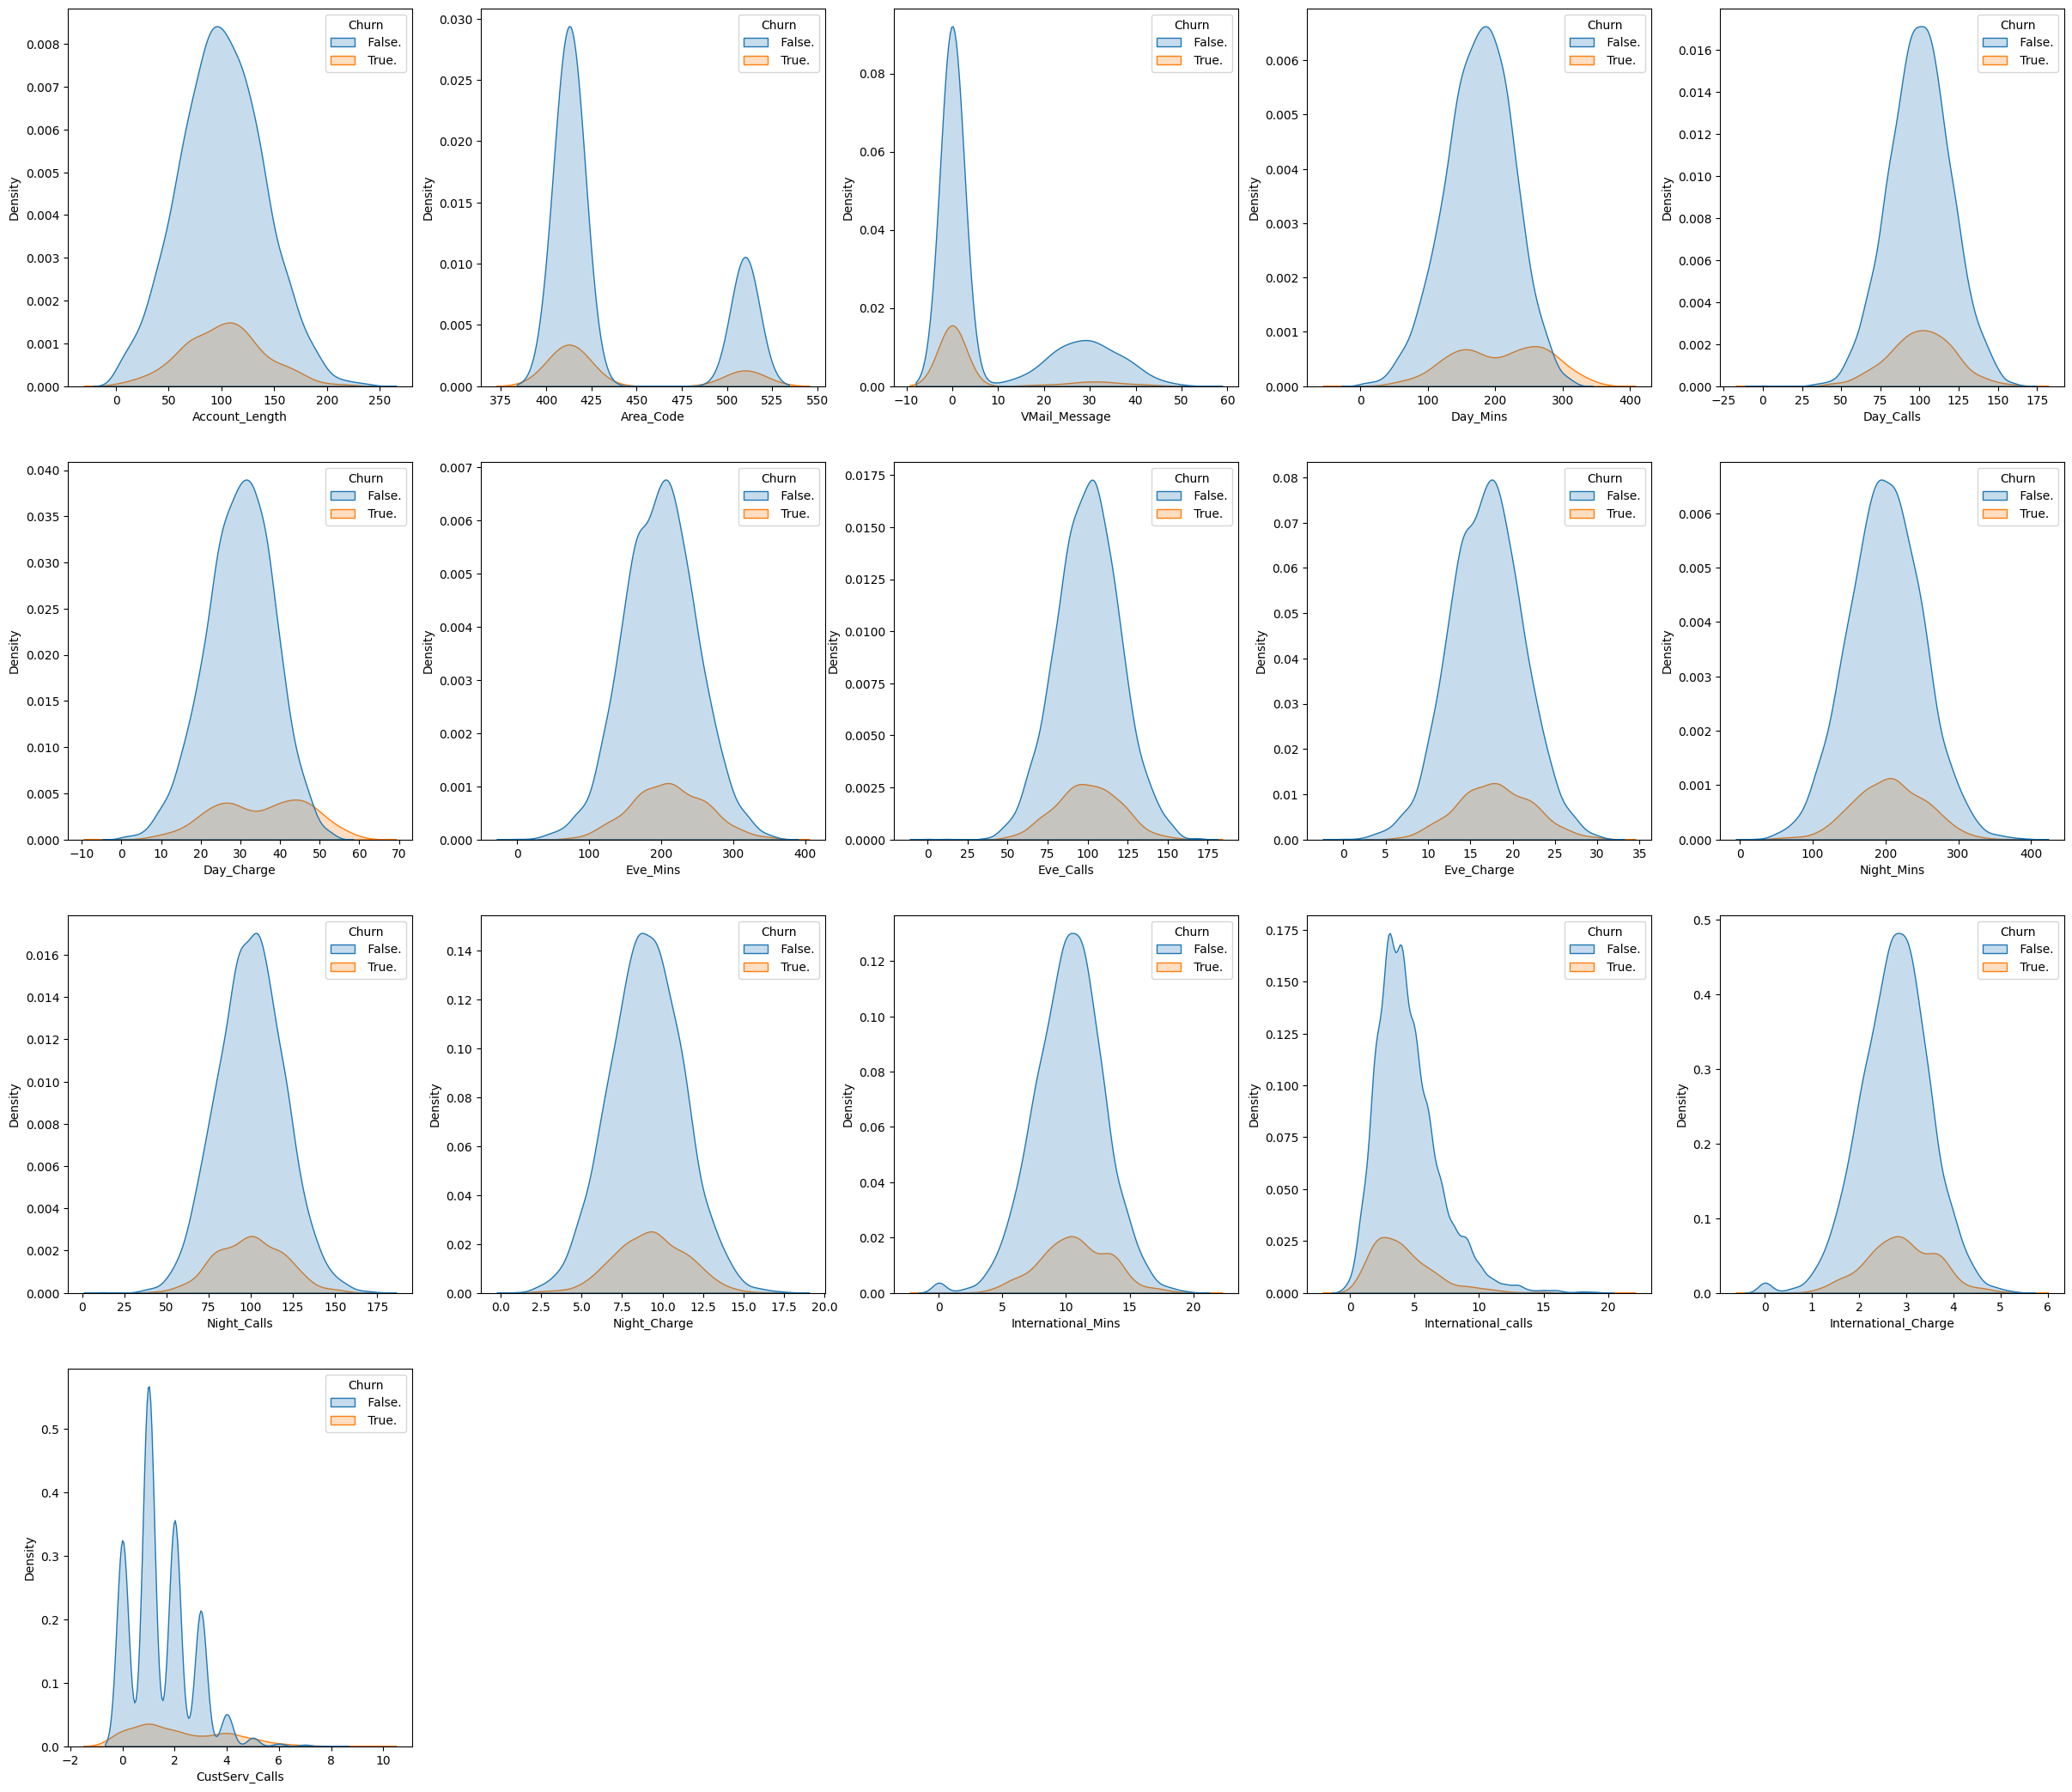

In [ ]:
plt.figure(figsize=(30,40))
i=1
for col in num_col:
  if i <24:
    ax= plt.subplot(6,5,i)
    sns.kdeplot(data=data,x=col,hue='Churn',fill=True)
  i+=1
plt.show()

Insights

* In bivariate analysis, it can be see that all the numerical columns (variable), the density of customer churn are much lower (most of them is stay use the provider), but in several columns (variable) there are condition where the trend of density customer churn with higher, such as :

1. Day_Min
2. Day_Charge
3. CustServ_Calls

This 3 variables have fluctuating trends

In [ ]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn', 'Prefix_num'],
      dtype='object')

In [ ]:
fig = px.pie(data, names='Churn', title='Churn Rate')
fig.show()

Insights

* '''Based on the data, 86% of customers stay with the provider's services, while only 14% of customer churns.'''

### 4.2. Data Preprocessing

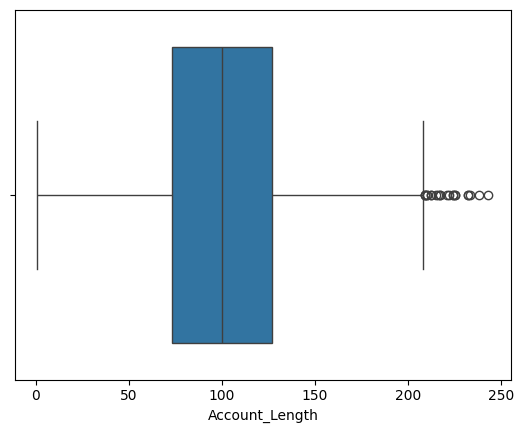

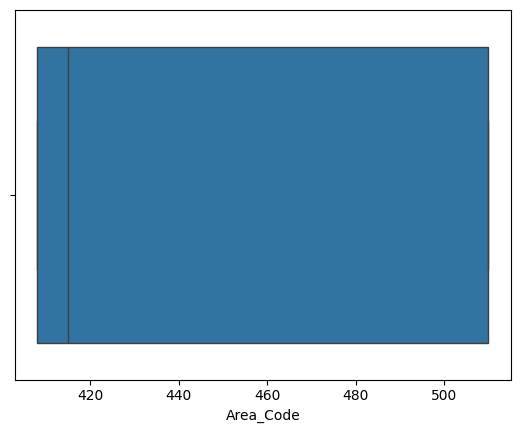

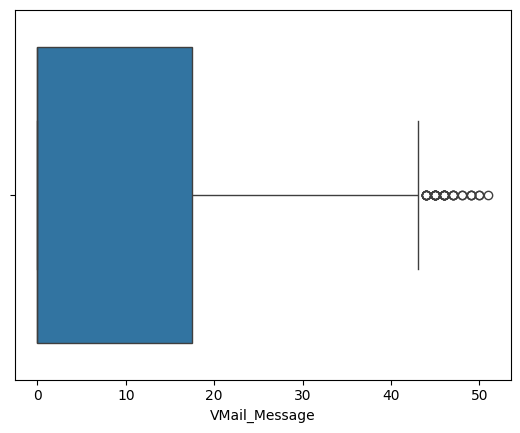

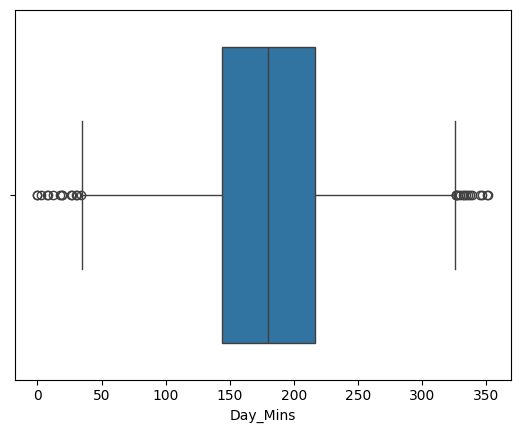

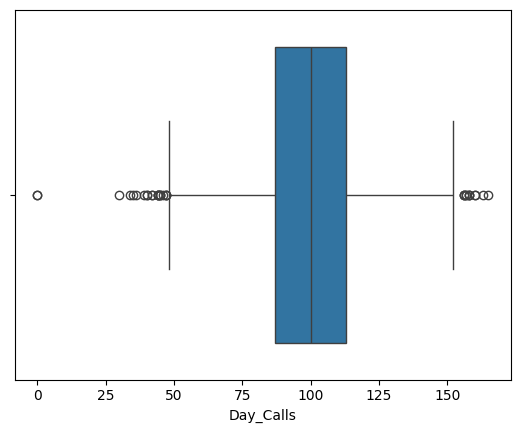

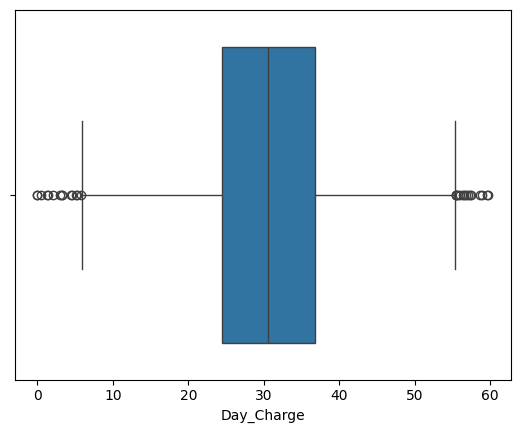

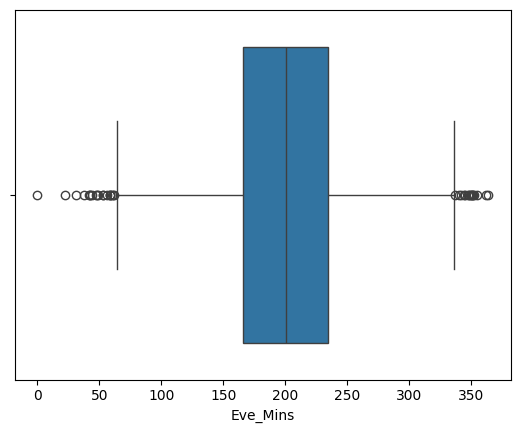

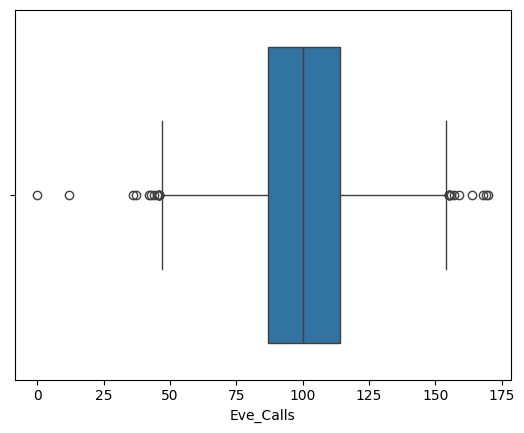

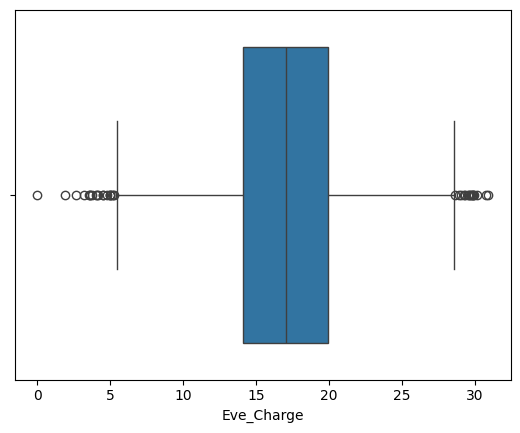

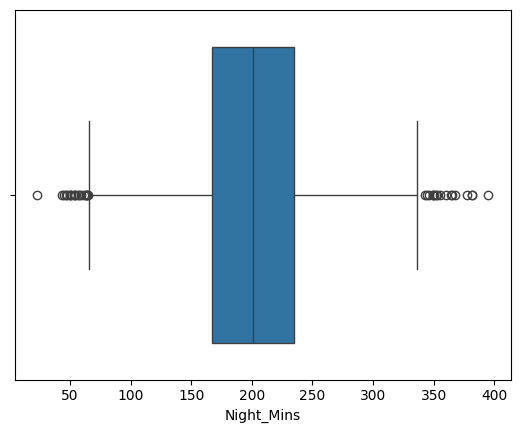

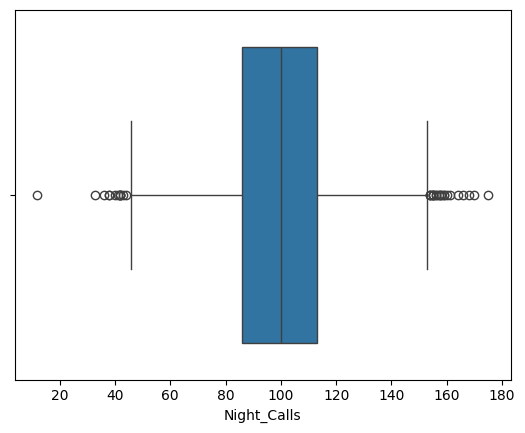

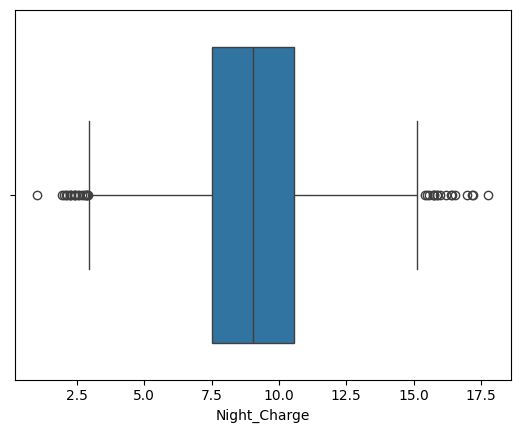

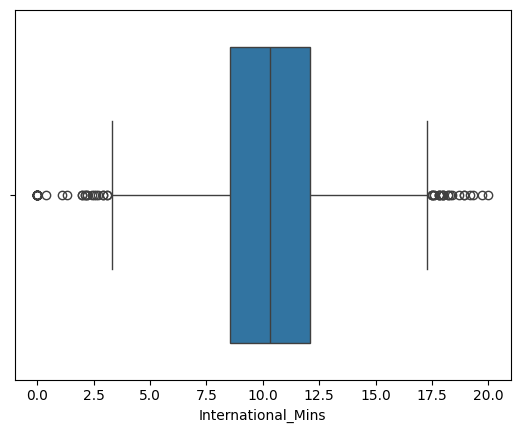

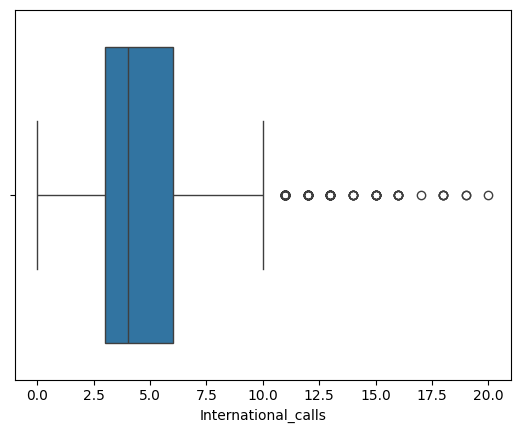

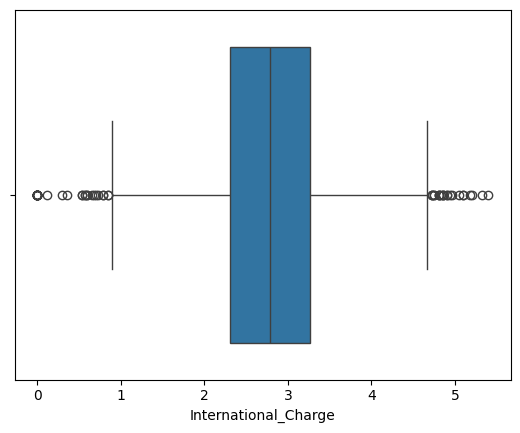

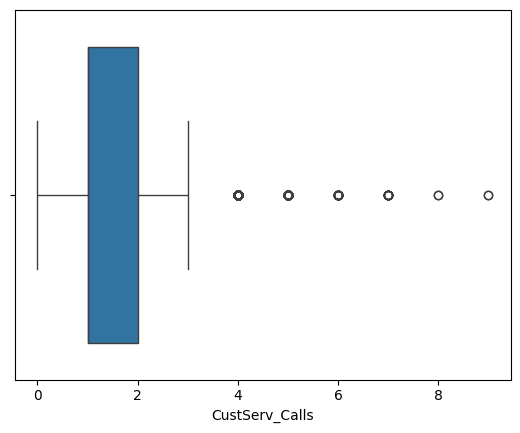

In [ ]:
# outlier detection
for i in num_col:
  sns.boxplot(data=data,x=i)
  plt.show()

In [ ]:
# importing iqr
!pip install feature-engine

In [ ]:
# winsorise techiniuqe
from feature_engine.outliers import Winsorizer
winsor= Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=list(num_col)) # convert num_col to a list
winsor.fit(data)
data= winsor.transform(data)

In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
data['VMail_Plan']= le.fit_transform(data['VMail_Plan'])
data['International_Plan']= le.fit_transform(data['International_Plan'])
data['Churn']= le.fit_transform(data['Churn'])

In [ ]:
#Droping unqiue features where model cant learn anything
data.drop('State',axis=1,inplace=True)
data.drop('Prefix_num',axis=1,inplace=True)
data.drop('Account_Length',axis=1,inplace=True)
data.drop('Phone',axis=1,inplace=True)

### 5. Feature Engineering

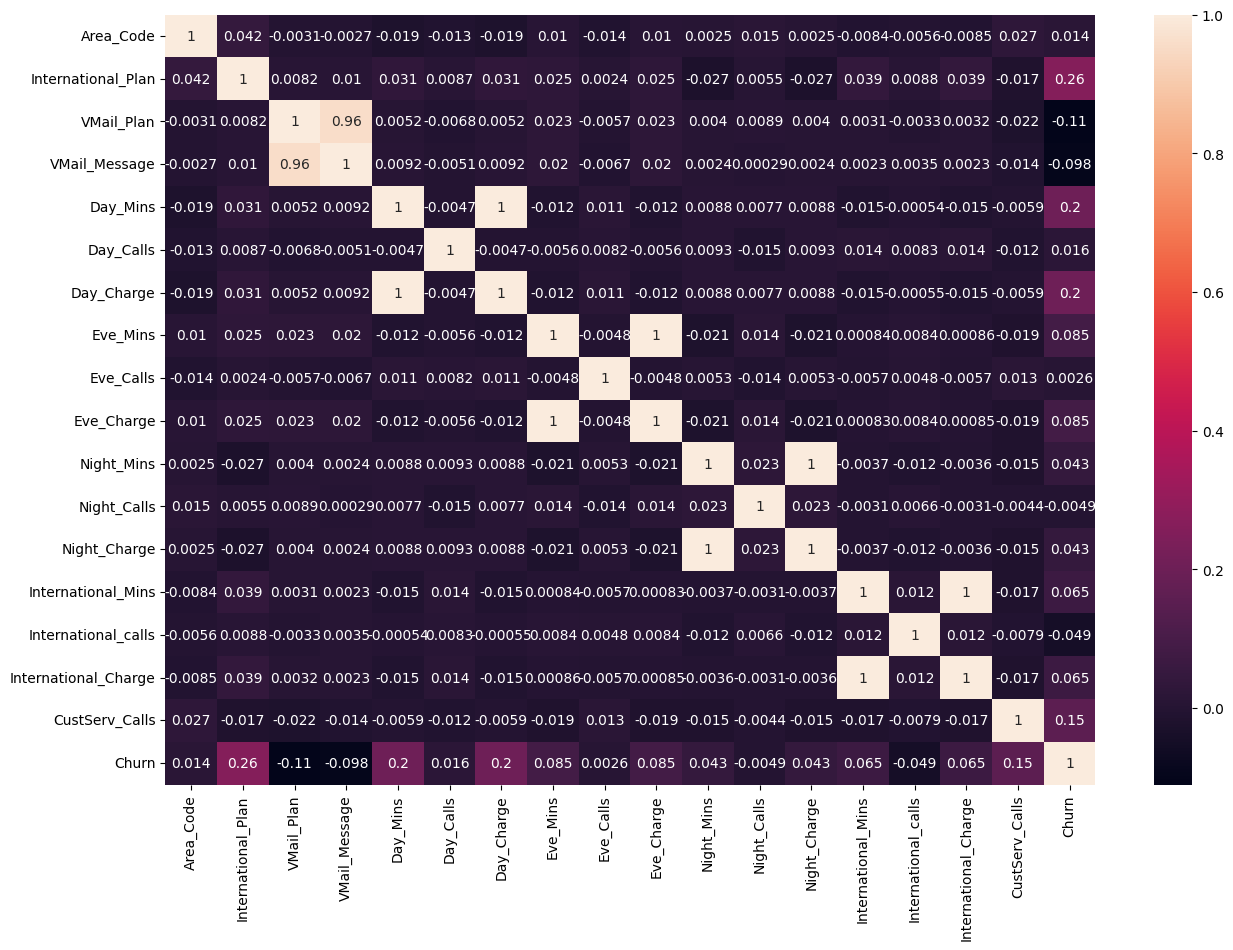

In [ ]:
#corelation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

Insights from heatmap

* VMail_plan and VMail_Message have high corelation.
* Day_Mins and Day_Charge have high corelation.
* Eve_Mins and Eve_Charge have high corelation.
* Night_Mins and Night_Charge have high corelation.
* International_Mins and International_Charge have high corelation.

In [ ]:
# Droping Vmail_Message and Day/Eve/Night/International Mins Features from the data
data.drop('VMail_Message',axis=1,inplace=True)
data.drop('Day_Mins',axis=1,inplace=True)
data.drop('Eve_Mins',axis=1,inplace=True)
data.drop('Night_Mins',axis=1,inplace=True)
data.drop('International_Mins',axis=1,inplace=True)

In [ ]:
pd.DataFrame(data)
data.shape

(4575, 13)

### 7. Spliting the data for model training and testing

In [ ]:
x= data.drop('Churn',axis=1)
y= data['Churn']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Scaling the dataset
scaler= MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

### 7.1 Logistic Regression

In [ ]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_pred))

Confusion_matrix [[771  25]
 [ 95  24]]
Classification_report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       796
           1       0.49      0.20      0.29       119

    accuracy                           0.87       915
   macro avg       0.69      0.59      0.61       915
weighted avg       0.84      0.87      0.84       915

Test Accuracy_score 0.8688524590163934


In [ ]:
# training accuracy
y_pred_train = clf.predict(x_train) # Predict labels for training data
print('Train Accuracy',accuracy_score(y_train, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.8655737704918033


### 7.2. Balancing the data

In [ ]:
# Checking balance
y_train.value_counts()
#

,count
Churn,
0,3129
1,531


In [ ]:
#Balancing the data
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_train,y_train)

### 7.3. Support Vector Machine

In [ ]:
# Algorithm
model = SVC()

model.fit(x_smote, y_smote)

y_pred_svc = model.predict(x_test)

y_pred_train = model.predict(x_smote) # Predict labels for training data

In [ ]:
# training accuracy
print('Train Accuracy',accuracy_score(y_smote, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.8913390859699585


In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_pred_svc))
print('Classification_report', classification_report(y_test,y_pred_svc))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_svc))

Confusion_matrix [[705  91]
 [ 18 101]]
Classification_report               precision    recall  f1-score   support

           0       0.98      0.89      0.93       796
           1       0.53      0.85      0.65       119

    accuracy                           0.88       915
   macro avg       0.75      0.87      0.79       915
weighted avg       0.92      0.88      0.89       915

Test Accuracy_score 0.8808743169398907


In [ ]:

cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')
cross_val

array([0.8580786 , 0.8580786 , 0.8580786 , 0.8580786 , 0.8580786 ,
       0.85776805, 0.85776805, 0.85776805, 0.85776805, 0.85776805])

In [ ]:
print('Cross validation score',cross_val.std())

Cross validation score 0.0001552750518379331


### 7.4. Decision Tree

In [ ]:
#import the algoo
from sklearn.tree import DecisionTreeClassifier

#init
model = DecisionTreeClassifier()

#train
model.fit(x_smote,y_smote)

y_test_pred = model.predict(x_test)

In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_test_pred))
print('Classification_report', classification_report(y_test,y_test_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_test_pred))

Confusion_matrix [[715  81]
 [ 29  90]]
Classification_report               precision    recall  f1-score   support

           0       0.96      0.90      0.93       796
           1       0.53      0.76      0.62       119

    accuracy                           0.88       915
   macro avg       0.74      0.83      0.77       915
weighted avg       0.90      0.88      0.89       915

Test Accuracy_score 0.8797814207650273


In [ ]:
y_train_pred= model.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred))

Train Accuracy 1.0


### 7.5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier() # by default it is building 100 estimators

model_rf.fit(x_smote,y_smote)

y_pred_rf = model_rf.predict(x_test)

In [ ]:
#print('Confusion_matrix',confusion_matrix(y_test,y_pred_rf))
print('Classification_report', classification_report(y_test,y_pred_rf))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_rf))

Classification_report               precision    recall  f1-score   support

           0       0.98      0.96      0.97       796
           1       0.78      0.86      0.82       119

    accuracy                           0.95       915
   macro avg       0.88      0.91      0.89       915
weighted avg       0.95      0.95      0.95       915

Test Accuracy_score 0.9497267759562842


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion_matrix', confusion_matrix(y_test, y_pred_rf))

Confusion_matrix [[767  29]
 [ 17 102]]


In [ ]:
#traing presdiction
y_train_pred_rf= model_rf.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred_rf))

Train Accuracy 1.0


### 7.6. KNeighborsClassifier

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

model_knn.fit(x_smote,y_smote)

y_pred_knn = model_knn.predict(x_test)

In [ ]:
#traing presdiction
y_train_pred_knn= model_knn.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred_knn))

Train Accuracy 0.923777564717162


In [ ]:
#Testing Prediction
print('Confusion_matrix',confusion_matrix(y_test,y_pred_knn))
print('Classification_report', classification_report(y_test,y_pred_knn))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_knn))

Confusion_matrix [[624 172]
 [ 26  93]]
Classification_report               precision    recall  f1-score   support

           0       0.96      0.78      0.86       796
           1       0.35      0.78      0.48       119

    accuracy                           0.78       915
   macro avg       0.66      0.78      0.67       915
weighted avg       0.88      0.78      0.81       915

Test Accuracy_score 0.7836065573770492


### 8. Model Report

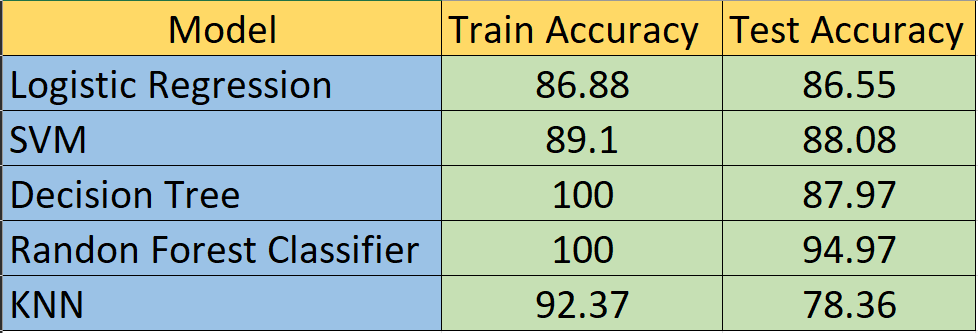